In [29]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('..')
from BBH_kick_sim import Simulator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
params={
    'cluster_mass': 1e6, #Default=1e6
    'radius': 2, #Default=2
    'imf_alpha':2.25, #Default=2.35
    'min_bh_star':10, #Default=10
    'bh_mass_frac':0.5, #Default=0.5
    'use_mass_lookup':True, #Default=False
    'min_star':0.8, #Default=0.8
    'max_star':100, #Default=100
    'vel_thresh':0.1, #Default=0.1
    'rand_spin_type':'uniform', #Default='uniform'
}

sim = Simulator.Simulator(params,print_missing=True,rand_seed=1)
print(f'Escape velocity={sim.GC.v_esc}')

Setting up analytic mass distribution. This may take a while depending on your imf alpha
Done
Loaded NRSur7dq4Remnant fit.
Loaded NRSur3dq8Remnant fit.
Setup complete, Globular Cluster now has 14321 black holes.
Escape velocity=65.76879710558413


In [31]:
sim.begin_sim(sort_mass_first=False)

No stop time specified, Running until 1 or 0 black holes remain
14321/14321 remaining
12663/14321 remaining
10989/14321 remaining
9340/14321 remaining
7668/14321 remaining
5990/14321 remaining
4319/14321 remaining
2662/14321 remaining
752/14321 remaining
Finished. Total Simulation time: 1235374.643452343
Total CPU time: 32.02620315551758


In [34]:
sim.rng.random(size=1000)

[autoreload of BBH_kick_sim.Simulator failed: Traceback (most recent call last):
  File "/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/gersbaka/Documents/Homework/Astro8020/BBH-pop

array([2.67161748e-01, 5.17311418e-01, 2.68230201e-01, 3.84984388e-01,
       7.73969660e-01, 1.32719471e-01, 5.47835586e-01, 5.73698155e-01,
       1.23761284e-01, 3.05688991e-02, 3.85701681e-01, 7.29861531e-01,
       9.72261627e-01, 7.15820572e-01, 8.51481175e-02, 3.00202258e-01,
       6.69079083e-01, 9.14822039e-02, 4.02106431e-01, 3.41469855e-01,
       3.35525626e-01, 9.73480208e-01, 5.25129006e-01, 6.62894523e-01,
       6.38961571e-01, 9.65333507e-01, 1.42507102e-01, 4.17693599e-02,
       7.80967413e-01, 9.75696561e-01, 9.58823110e-01, 3.82525212e-01,
       8.76413643e-01, 5.27732421e-01, 4.18216256e-02, 2.14525391e-03,
       4.80789722e-01, 8.92069070e-01, 7.61836983e-01, 1.63388246e-01,
       1.68195769e-01, 4.08942133e-01, 1.22139022e-01, 6.75775239e-01,
       3.69239640e-01, 3.61622561e-01, 8.44562693e-01, 9.21575645e-01,
       8.18071068e-01, 9.27171988e-01, 4.98191509e-01, 2.88579826e-01,
       8.41455849e-01, 4.54226399e-01, 8.07278046e-01, 8.18533312e-01,
      

In [32]:
print(len(sim.GC.BHs),'in system, ejected:',len(sim.GC.ejected))
allBHs = sim.GC.BHs + sim.GC.ejected
print(len(allBHs))

1 in system, ejected: 5929
5930


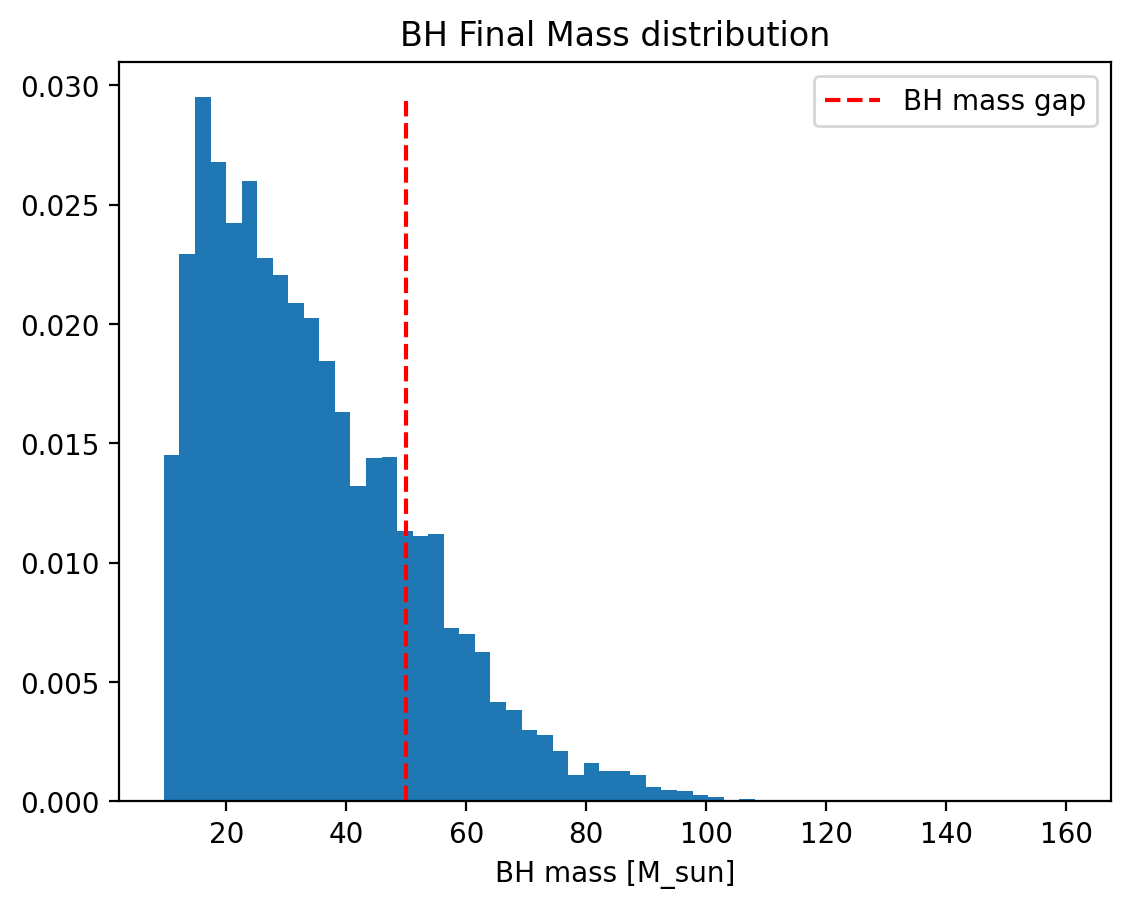

In [5]:
mall = [bh.m for bh in allBHs]
n,_,_=plt.hist(mall,bins='auto',density=True)
plt.title('BH Final Mass distribution')
plt.xlabel('BH mass [M_sun]')
maxBH = params['bh_mass_frac']*params['max_star']
plt.vlines(maxBH,0,max(n),linestyles='dashed',colors='r',label='BH mass gap')
plt.legend()
plt.show()

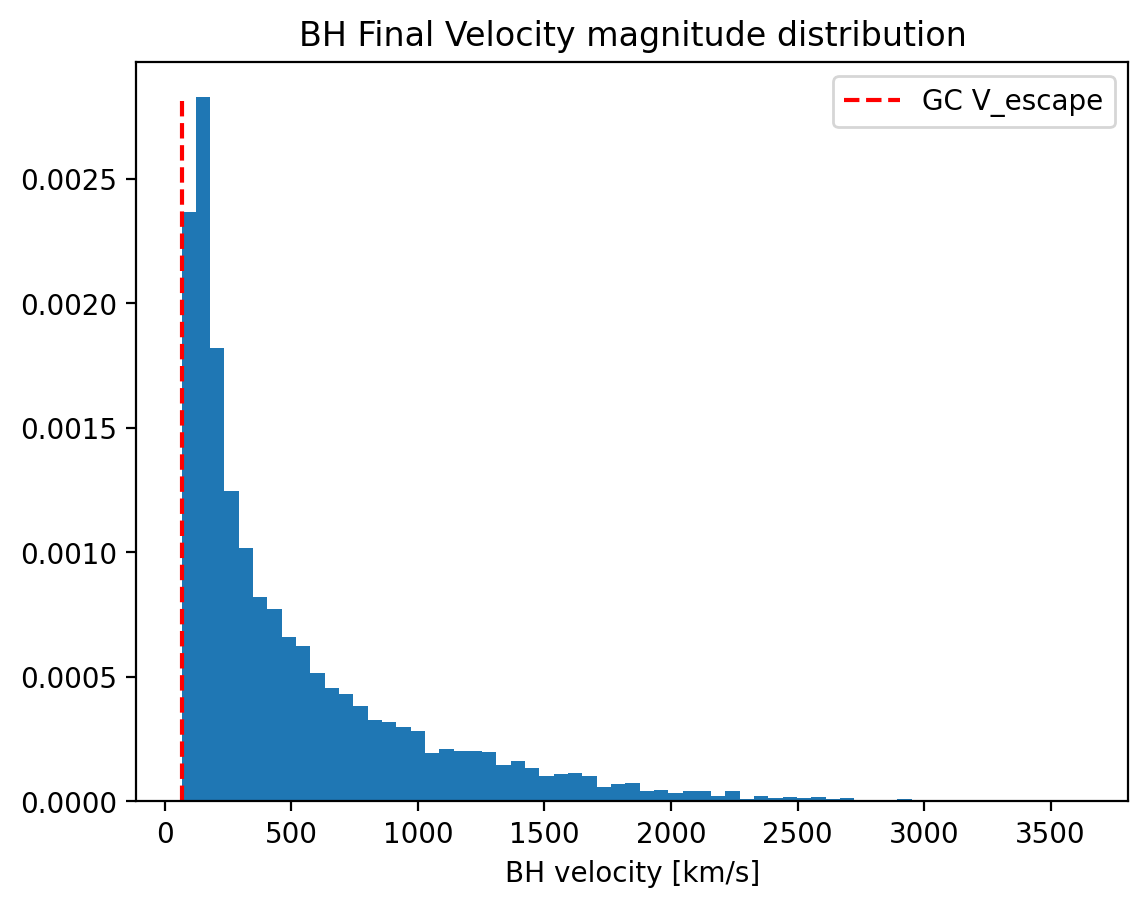

In [6]:
vall = np.array([np.sqrt(np.sum(np.square(bh.v))) for bh in allBHs])
n,_,_=plt.hist(vall,bins='auto',density=True)
plt.title('BH Final Velocity magnitude distribution')
plt.xlabel('BH velocity [km/s]')
plt.vlines(sim.GC.v_esc,0,max(n),linestyles='dashed',colors='r',label='GC V_escape')
plt.legend()
plt.show()

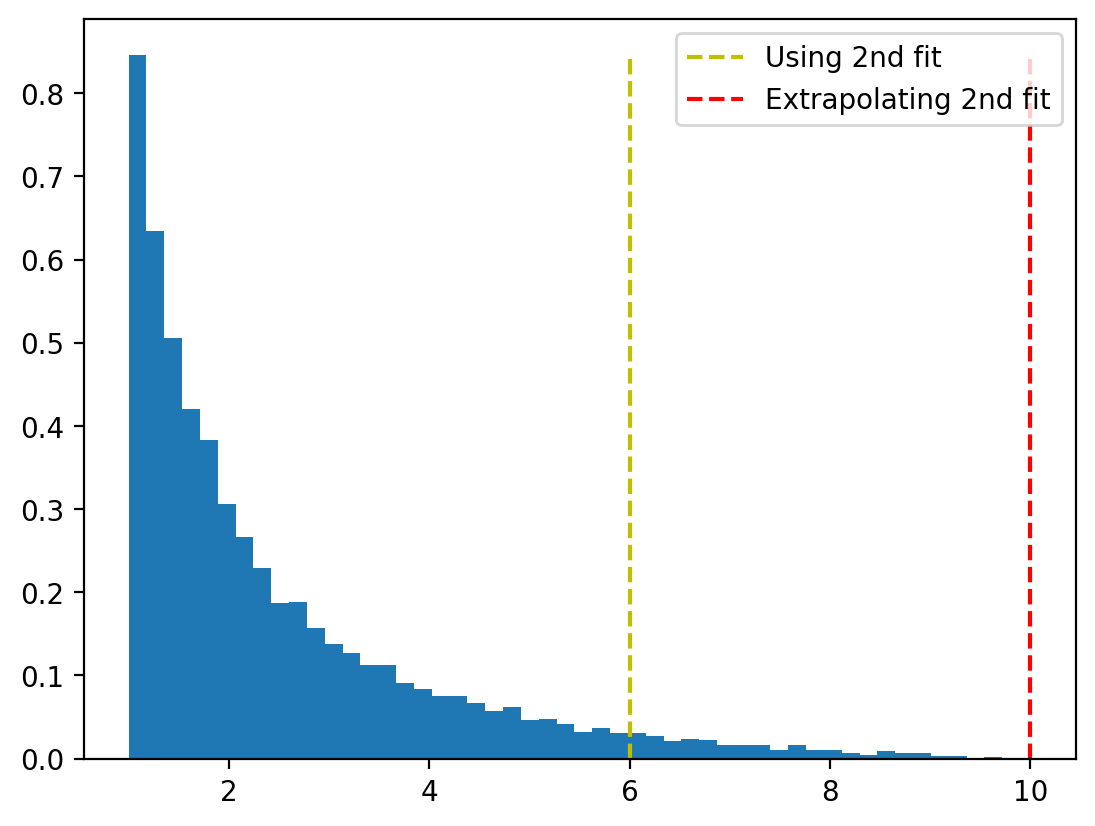

In [7]:
n,_,_=plt.hist(sim.collide_ratios,bins='auto',density=True)
plt.vlines(6,0,max(n),linestyles='dashed',colors='y',label='Using 2nd fit')
plt.vlines(10,0,max(n),linestyles='dashed',colors='r',label='Extrapolating 2nd fit')
plt.legend()
plt.show()

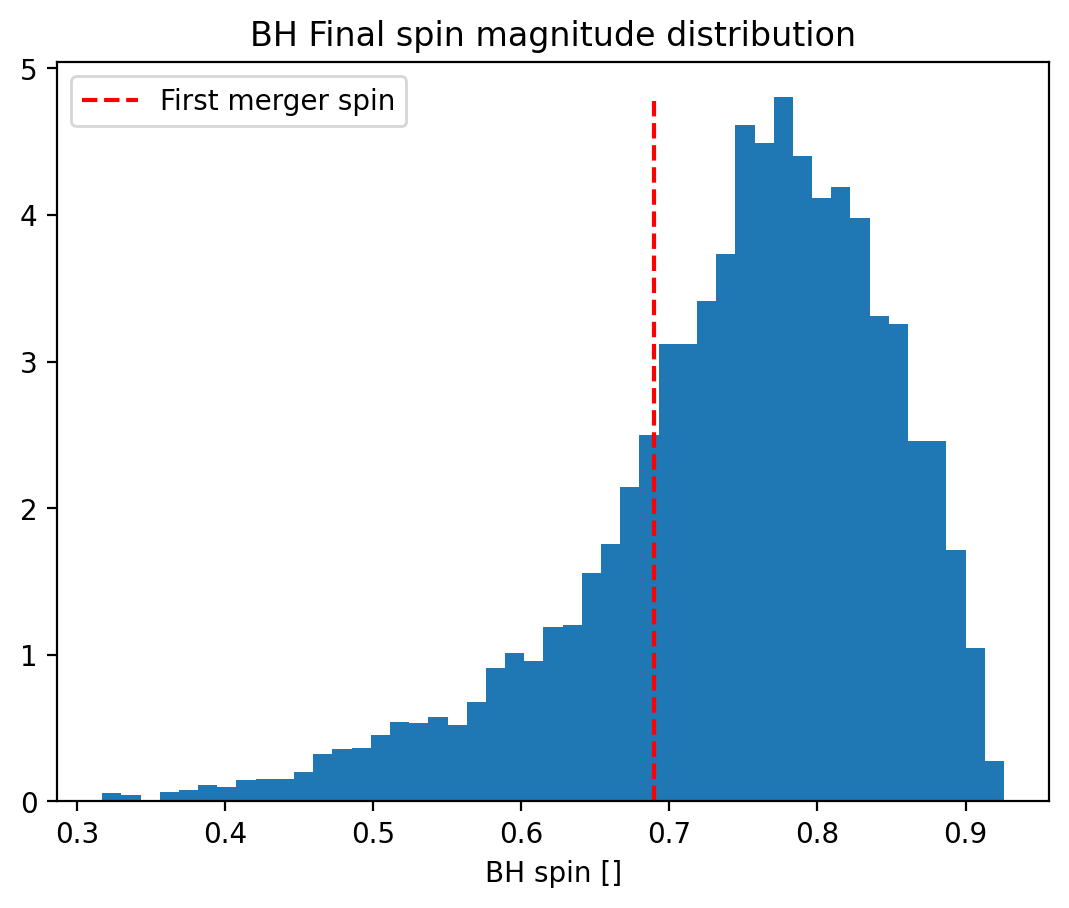

In [8]:
allS = np.array([np.sqrt(np.sum(np.square(bh.s))) for bh in allBHs])
n,_,_=plt.hist(allS,bins='auto',density=True)
plt.title('BH Final spin magnitude distribution')
plt.xlabel('BH spin []')
plt.vlines(0.69,0,max(n),linestyles='dashed',colors='r',label='First merger spin')
plt.legend()
plt.show()

In [33]:
allBHs.sort(key=lambda b: -b.m)
for bh in allBHs:
    bh.printTree(params=['m','v_imag','s'])

[m=175.047,s=[0.035 0.004 0.816],v_imag=1750.363]
├── [m=100.436,s=[0.289 0.441 0.5  ],v_imag=28.708]
│   ├── [m=53.804,s=[-0.014  0.011  0.087],v_imag=62.423]
│   │   ├── [m=52.438,s=[-0.029  0.026  0.083],v_imag=0.0]
│   │   └── [m=1.372,s=[-0.081 -0.024  0.885],v_imag=0.0]
│   └── [m=52.175,s=[-0.001  0.029  0.184],v_imag=62.483]
│       ├── [m=50.897,s=[-0.08  -0.016  0.197],v_imag=0.0]
│       └── [m=1.349,s=[-0.001 -0.013  0.19 ],v_imag=0.0]
└── [m=87.386,s=[-0.131 -0.599  0.498],v_imag=34.311]
    ├── [m=50.054,s=[0.007 0.168 0.367],v_imag=55.357]
    │   ├── [m=45.926,s=[-0.055 -0.021  0.178],v_imag=0.0]
    │   └── [m=4.619,s=[ 0.019 -0.023  0.397],v_imag=0.0]
    └── [m=42.891,s=[-0.023 -0.022  0.34 ],v_imag=55.349]
        ├── [m=41.16,s=[-0.037 -0.166  0.189],v_imag=0.0]
        └── [m=1.97,s=[-0.053 -0.197  0.788],v_imag=0.0]

[m=169.068,s=[0.025 0.074 0.899],v_imag=1294.322]
├── [m=97.638,s=[0.146 0.328 0.776],v_imag=58.349]
│   ├── [m=81.932,s=[-0.192 -0.073  0.726],v_im

[m=90.239,s=[ 0.012 -0.056  0.847],v_imag=532.634]
├── [m=52.468,s=[-0.006 -0.311  0.718],v_imag=34.86]
│   ├── [m=49.657,s=[0.114 0.346 0.635],v_imag=0.0]
│   └── [m=3.561,s=[0.039 0.014 0.563],v_imag=0.0]
└── [m=44.565,s=[0.095 0.043 0.336],v_imag=34.852]
    ├── [m=43.442,s=[0.05  0.16  0.319],v_imag=0.0]
    └── [m=1.363,s=[-0.121  0.006  0.445],v_imag=0.0]

[m=90.202,s=[ 0.008 -0.015  0.834],v_imag=317.272]
├── [m=50.367,s=[-0.06   0.065  0.45 ],v_imag=17.578]
│   ├── [m=49.395,s=[ 0.362 -0.35   0.142],v_imag=0.0]
│   └── [m=1.363,s=[ 0.041 -0.066  0.398],v_imag=0.0]
└── [m=46.424,s=[ 0.122 -0.182  0.589],v_imag=17.575]
    ├── [m=44.633,s=[-0.092 -0.358  0.456],v_imag=0.0]
    └── [m=2.275,s=[-0.143 -0.12   0.267],v_imag=0.0]

[m=90.137,s=[ 0.041 -0.147  0.797],v_imag=716.694]
├── [m=53.63,s=[ 0.047 -0.247  0.354],v_imag=35.291]
│   ├── [m=50.457,s=[0.147 0.042 0.251],v_imag=0.0]
│   └── [m=3.594,s=[-0.068 -0.093  0.304],v_imag=0.0]
└── [m=42.505,s=[ 0.217 -0.747  0.393],v_imag=3

[m=85.013,s=[0.006 0.006 0.819],v_imag=356.129]
├── [m=51.143,s=[0.059 0.051 0.533],v_imag=35.745]
│   ├── [m=50.258,s=[0.044 0.011 0.625],v_imag=0.0]
│   └── [m=1.376,s=[-0.     0.     0.011],v_imag=0.0]
└── [m=39.66,s=[-0.051 -0.05   0.357],v_imag=35.739]
    ├── [m=38.522,s=[0.015 0.113 0.325],v_imag=0.0]
    └── [m=1.367,s=[-0.309 -0.232  0.559],v_imag=0.0]

[m=84.999,s=[ 0.032 -0.028  0.789],v_imag=141.338]
├── [m=53.155,s=[ 0.107 -0.133  0.241],v_imag=0.0]
└── [m=37.214,s=[ 0.01  -0.     0.727],v_imag=0.0]

[m=84.992,s=[-0.046 -0.003  0.753],v_imag=664.438]
├── [m=51.669,s=[0.047 0.037 0.367],v_imag=0.0]
└── [m=38.175,s=[-0.459 -0.057  0.017],v_imag=0.0]

[m=84.972,s=[-0.114  0.112  0.777],v_imag=1742.889]
├── [m=52.596,s=[-0.402  0.524  0.458],v_imag=0.0]
└── [m=37.591,s=[-0.004 -0.004  0.005],v_imag=0.0]

[m=84.963,s=[ 0.08  -0.009  0.768],v_imag=760.197]
├── [m=48.746,s=[ 0.34  -0.109  0.455],v_imag=0.0]
└── [m=41.363,s=[0.032 0.002 0.03 ],v_imag=0.0]

[m=84.91,s=[-0.007 -0.00

[m=82.855,s=[0.005 0.003 0.773],v_imag=481.211]
├── [m=51.296,s=[0.109 0.055 0.212],v_imag=0.0]
└── [m=36.595,s=[-0.167 -0.103  0.614],v_imag=0.0]

[m=82.832,s=[0.044 0.094 0.755],v_imag=376.089]
├── [m=48.7,s=[0.057 0.203 0.099],v_imag=0.0]
└── [m=38.97,s=[0.248 0.34  0.491],v_imag=0.0]

[m=82.821,s=[0.022 0.082 0.73 ],v_imag=243.852]
├── [m=51.324,s=[0.111 0.276 0.137],v_imag=56.35]
│   ├── [m=49.481,s=[ 0.237 -0.009  0.111],v_imag=0.0]
│   └── [m=2.113,s=[ 0.015 -0.044  0.507],v_imag=0.0]
└── [m=35.995,s=[0.003 0.073 0.313],v_imag=56.404]
    ├── [m=34.648,s=[0.02  0.004 0.246],v_imag=0.0]
    └── [m=1.534,s=[-0.156 -0.037  0.824],v_imag=0.0]

[m=82.787,s=[ 0.064 -0.076  0.807],v_imag=281.066]
├── [m=53.537,s=[ 0.206 -0.312  0.339],v_imag=11.884]
│   ├── [m=52.544,s=[ 0.219 -0.105  0.521],v_imag=0.0]
│   └── [m=1.468,s=[0.124 0.256 0.378],v_imag=0.0]
└── [m=34.685,s=[ 0.015 -0.015  0.769],v_imag=11.886]
    ├── [m=33.79,s=[-0.103  0.028  0.792],v_imag=0.0]
    └── [m=1.366,s=[ 0.118

[m=78.772,s=[-0.002 -0.011  0.836],v_imag=170.523]
├── [m=50.248,s=[ 0.01  -0.034  0.722],v_imag=0.0]
└── [m=33.923,s=[-0.041 -0.026  0.078],v_imag=0.0]

[m=78.737,s=[ 0.012 -0.039  0.703],v_imag=519.145]
├── [m=46.884,s=[0.056 0.025 0.013],v_imag=0.0]
└── [m=35.963,s=[-0.026 -0.367  0.22 ],v_imag=0.0]

[m=78.73,s=[ 0.007 -0.     0.837],v_imag=112.56]
├── [m=42.262,s=[ 0.037 -0.006  0.627],v_imag=27.873]
│   ├── [m=39.111,s=[0.062 0.023 0.495],v_imag=0.0]
│   └── [m=3.669,s=[-0.008 -0.021  0.065],v_imag=0.0]
└── [m=42.259,s=[ 0.    -0.     0.417],v_imag=27.824]
    ├── [m=41.155,s=[-0.142  0.209  0.335],v_imag=0.0]
    └── [m=1.394,s=[0.146 0.26  0.274],v_imag=0.0]

[m=78.729,s=[-0.089 -0.008  0.851],v_imag=1199.449]
├── [m=49.387,s=[-0.342  0.022  0.797],v_imag=0.0]
└── [m=35.22,s=[ 0.002 -0.013  0.139],v_imag=0.0]

[m=78.725,s=[-0.076  0.015  0.79 ],v_imag=120.102]
├── [m=54.258,s=[-0.185  0.062  0.384],v_imag=31.287]
│   ├── [m=53.274,s=[0.028 0.161 0.49 ],v_imag=0.0]
│   └── [m=1.3

[m=76.224,s=[0.    0.    0.828],v_imag=73.642]
├── [m=40.966,s=[-0.007 -0.012  0.584],v_imag=28.563]
│   ├── [m=40.002,s=[ 0.127 -0.174  0.575],v_imag=0.0]
│   └── [m=1.388,s=[ 0.053 -0.011  0.084],v_imag=0.0]
└── [m=40.705,s=[0.008 0.014 0.391],v_imag=28.56]
    ├── [m=39.619,s=[-0.07   0.228  0.303],v_imag=0.0]
    └── [m=1.341,s=[-0.06  -0.04   0.889],v_imag=0.0]

[m=76.22,s=[ 0.037 -0.034  0.86 ],v_imag=1987.345]
├── [m=41.733,s=[ 0.517 -0.225  0.639],v_imag=27.001]
│   ├── [m=38.429,s=[0.095 0.773 0.152],v_imag=0.0]
│   └── [m=4.191,s=[-0.039 -0.011  0.205],v_imag=0.0]
└── [m=40.706,s=[-0.342 -0.002  0.631],v_imag=26.993]
    ├── [m=39.068,s=[-0.347  0.541  0.24 ],v_imag=0.0]
    └── [m=2.123,s=[-0.01  -0.005  0.009],v_imag=0.0]

[m=76.219,s=[-0.039 -0.024  0.872],v_imag=1407.248]
├── [m=49.736,s=[ 0.036 -0.004  0.848],v_imag=0.0]
└── [m=32.343,s=[-0.425 -0.247  0.189],v_imag=0.0]

[m=76.18,s=[-0.012 -0.013  0.789],v_imag=130.542]
├── [m=46.075,s=[-0.049 -0.044  0.424],v_imag=0.0]

[m=73.51,s=[-0.061 -0.033  0.76 ],v_imag=849.247]
├── [m=45.47,s=[-0.278 -0.05   0.315],v_imag=0.0]
└── [m=32.315,s=[ 0.071 -0.086  0.231],v_imag=0.0]

[m=73.475,s=[-0.018  0.001  0.829],v_imag=200.692]
├── [m=40.928,s=[-0.083  0.029  0.54 ],v_imag=23.558]
│   ├── [m=39.945,s=[-0.12  -0.215  0.515],v_imag=0.0]
│   └── [m=1.376,s=[0.042 0.055 0.209],v_imag=0.0]
└── [m=37.814,s=[-0.007 -0.011  0.439],v_imag=23.549]
    ├── [m=36.729,s=[0.113 0.108 0.394],v_imag=0.0]
    └── [m=1.36,s=[-0.502 -0.022  0.396],v_imag=0.0]

[m=73.454,s=[0.04  0.006 0.756],v_imag=1750.787]
├── [m=39.953,s=[-0.304  0.06   0.149],v_imag=0.0]
└── [m=37.998,s=[ 0.578 -0.074  0.386],v_imag=0.0]

[m=73.402,s=[ 0.062 -0.071  0.779],v_imag=949.191]
├── [m=41.139,s=[ 0.024 -0.1    0.304],v_imag=0.0]
└── [m=36.927,s=[ 0.335 -0.396  0.32 ],v_imag=0.0]

[m=73.387,s=[ 0.042 -0.036  0.828],v_imag=582.732]
├── [m=46.988,s=[ 0.021 -0.051  0.545],v_imag=25.53]
│   ├── [m=45.221,s=[ 0.167 -0.197  0.429],v_imag=0.0]
│   └── [m=2

[m=69.725,s=[0.    0.    0.717],v_imag=97.786]
├── [m=40.351,s=[0.    0.    0.002],v_imag=0.0]
└── [m=33.134,s=[-0.     0.003  0.306],v_imag=0.0]

[m=69.712,s=[ 0.019 -0.012  0.851],v_imag=544.826]
├── [m=40.664,s=[ 0.143 -0.046  0.493],v_imag=0.0]
└── [m=34.412,s=[-0.075 -0.035  0.723],v_imag=0.0]

[m=69.703,s=[-0.018  0.004  0.75 ],v_imag=172.439]
├── [m=45.139,s=[-0.005  0.037  0.137],v_imag=0.0]
└── [m=28.514,s=[-0.133 -0.037  0.74 ],v_imag=0.0]

[m=69.688,s=[ 0.011 -0.018  0.839],v_imag=356.194]
├── [m=38.531,s=[-0.022 -0.026  0.363],v_imag=0.0]
└── [m=36.347,s=[ 0.09  -0.092  0.729],v_imag=0.0]

[m=69.66,s=[-0.129  0.014  0.779],v_imag=1601.3]
├── [m=38.998,s=[-0.627  0.209  0.484],v_imag=0.0]
└── [m=35.151,s=[-0.007 -0.028  0.12 ],v_imag=0.0]

[m=69.632,s=[-0.016 -0.002  0.808],v_imag=2805.498]
├── [m=38.475,s=[-0.53  -0.022  0.574],v_imag=25.442]
│   ├── [m=36.269,s=[ 0.002 -0.722  0.074],v_imag=0.0]
│   └── [m=2.751,s=[ 0.    -0.001  0.001],v_imag=0.0]
└── [m=36.109,s=[0.516 0

[m=66.851,s=[ 0.025 -0.002  0.809],v_imag=187.035]
├── [m=39.011,s=[ 0.09  -0.002  0.534],v_imag=0.0]
└── [m=32.294,s=[ 0.033 -0.035  0.259],v_imag=0.0]

[m=66.792,s=[-0.115 -0.035  0.811],v_imag=1835.073]
├── [m=36.021,s=[-0.016  0.097  0.469],v_imag=19.269]
│   ├── [m=34.967,s=[-0.044  0.339  0.312],v_imag=0.0]
│   └── [m=1.343,s=[0.07  0.117 0.538],v_imag=0.0]
└── [m=35.473,s=[-0.663 -0.244  0.433],v_imag=19.282]
    ├── [m=34.646,s=[0.442 0.17  0.737],v_imag=0.0]
    └── [m=1.355,s=[-0.19  -0.797  0.248],v_imag=0.0]

[m=66.781,s=[-0.     0.001  0.757],v_imag=78.129]
├── [m=36.032,s=[0.    0.004 0.429],v_imag=0.0]
└── [m=34.686,s=[-0.001  0.002  0.025],v_imag=0.0]

[m=66.778,s=[ 0.047 -0.073  0.755],v_imag=864.308]
├── [m=39.896,s=[-0.055 -0.175  0.333],v_imag=0.0]
└── [m=30.817,s=[ 0.414 -0.31   0.106],v_imag=0.0]

[m=66.771,s=[-0.007  0.039  0.801],v_imag=339.125]
├── [m=37.622,s=[ 0.006 -0.227  0.308],v_imag=0.0]
└── [m=33.617,s=[-0.066  0.56   0.521],v_imag=0.0]

[m=66.77,s=[ 0.

[m=64.342,s=[ 0.052 -0.006  0.852],v_imag=204.32]
├── [m=48.77,s=[ 0.106 -0.048  0.686],v_imag=11.6]
│   ├── [m=48.014,s=[0.281 0.348 0.661],v_imag=0.0]
│   └── [m=1.377,s=[-0.021  0.     0.396],v_imag=0.0]
└── [m=19.435,s=[0.087 0.136 0.541],v_imag=11.615]
    ├── [m=18.275,s=[-0.292  0.274  0.205],v_imag=0.0]
    └── [m=1.353,s=[-0.009  0.003  0.668],v_imag=0.0]

[m=64.325,s=[-0.012 -0.005  0.788],v_imag=125.468]
├── [m=36.582,s=[-0.019  0.048  0.111],v_imag=0.0]
└── [m=31.881,s=[-0.047 -0.087  0.695],v_imag=0.0]

[m=64.299,s=[ 0.034 -0.068  0.806],v_imag=231.747]
├── [m=36.868,s=[0.116 0.013 0.268],v_imag=0.0]
└── [m=31.803,s=[ 0.079 -0.521  0.624],v_imag=0.0]

[m=64.296,s=[-0.043 -0.037  0.778],v_imag=332.641]
├── [m=37.95,s=[0.004 0.012 0.326],v_imag=0.0]
└── [m=30.301,s=[-0.319 -0.272  0.328],v_imag=0.0]

[m=64.281,s=[0.122 0.029 0.798],v_imag=220.146]
├── [m=44.304,s=[0.258 0.065 0.402],v_imag=27.483]
│   ├── [m=41.425,s=[0.003 0.01  0.336],v_imag=0.0]
│   └── [m=3.277,s=[0.263 

[m=61.008,s=[-0.066  0.035  0.781],v_imag=188.17]
├── [m=42.843,s=[-0.147  0.079  0.369],v_imag=33.243]
│   ├── [m=41.788,s=[-0.06   0.191  0.37 ],v_imag=0.0]
│   └── [m=1.337,s=[ 0.024 -0.025  0.241],v_imag=0.0]
└── [m=21.637,s=[-0.172  0.238  0.76 ],v_imag=33.249]
    ├── [m=20.6,s=[0.079 0.347 0.697],v_imag=0.0]
    └── [m=1.354,s=[0.01  0.001 0.354],v_imag=0.0]

[m=60.981,s=[-0.072  0.009  0.835],v_imag=1226.044]
├── [m=33.924,s=[-0.4    0.066  0.415],v_imag=14.421]
│   ├── [m=32.681,s=[ 0.077 -0.431  0.314],v_imag=0.0]
│   └── [m=1.569,s=[0.003 0.086 0.68 ],v_imag=0.0]
└── [m=31.598,s=[0.031 0.036 0.66 ],v_imag=14.466]
    ├── [m=29.944,s=[ 0.005 -0.016  0.585],v_imag=0.0]
    └── [m=2.01,s=[-0.184 -0.459  0.359],v_imag=0.0]

[m=60.955,s=[ 0.091 -0.031  0.796],v_imag=1478.462]
├── [m=32.941,s=[ 0.498 -0.253  0.378],v_imag=53.547]
│   ├── [m=29.597,s=[ 0.411 -0.184  0.245],v_imag=0.0]
│   └── [m=3.92,s=[-0.065 -0.208  0.273],v_imag=0.0]
└── [m=32.093,s=[-0.013 -0.001  0.386],v_imag

[m=57.803,s=[0.    0.    0.631],v_imag=72.545]
├── [m=50.975,s=[-0.078  0.198  0.364],v_imag=0.0]
└── [m=7.903,s=[-0.015  0.003  0.008],v_imag=0.0]

[m=57.799,s=[-0.05   0.06   0.869],v_imag=613.973]
├── [m=31.387,s=[-0.256  0.232  0.702],v_imag=26.43]
│   ├── [m=30.175,s=[-0.016 -0.015  0.764],v_imag=0.0]
│   └── [m=1.633,s=[-0.019  0.022  0.408],v_imag=0.0]
└── [m=31.258,s=[-0.017  0.156  0.593],v_imag=26.424]
    ├── [m=28.986,s=[-0.151 -0.186  0.42 ],v_imag=0.0]
    └── [m=2.641,s=[-0.     0.     0.142],v_imag=0.0]

[m=57.792,s=[0.046 0.007 0.763],v_imag=506.99]
├── [m=40.761,s=[0.009 0.037 0.353],v_imag=0.0]
└── [m=20.106,s=[ 0.561 -0.139  0.601],v_imag=0.0]

[m=57.781,s=[0.032 0.014 0.844],v_imag=87.963]
├── [m=31.315,s=[-0.143  0.449  0.558],v_imag=18.371]
│   ├── [m=30.312,s=[-0.137  0.361  0.615],v_imag=0.0]
│   └── [m=1.395,s=[-0.081  0.356  0.315],v_imag=0.0]
└── [m=30.911,s=[ 0.321 -0.398  0.556],v_imag=18.384]
    ├── [m=29.964,s=[ 0.077 -0.142  0.745],v_imag=0.0]
    └── 

[m=54.807,s=[-0.028  0.021  0.791],v_imag=246.415]
├── [m=38.869,s=[-0.079  0.081  0.539],v_imag=0.0]
└── [m=18.911,s=[ 0.037 -0.04   0.03 ],v_imag=0.0]

[m=54.8,s=[-0.068 -0.007  0.85 ],v_imag=435.252]
├── [m=33.478,s=[-0.255  0.053  0.567],v_imag=0.0]
└── [m=25.495,s=[-0.034 -0.087  0.627],v_imag=0.0]

[m=54.763,s=[0.003 0.013 0.62 ],v_imag=175.769]
├── [m=41.558,s=[0.014 0.025 0.1  ],v_imag=0.0]
└── [m=15.164,s=[-0.056  0.028  0.526],v_imag=0.0]

[m=54.762,s=[0.115 0.086 0.697],v_imag=209.021]
├── [m=37.936,s=[0.258 0.309 0.145],v_imag=26.301]
│   ├── [m=36.84,s=[ 0.001 -0.     0.411],v_imag=0.0]
│   └── [m=1.363,s=[-0.233 -0.115  0.497],v_imag=0.0]
└── [m=19.362,s=[ 0.446 -0.463  0.351],v_imag=26.299]
    ├── [m=18.226,s=[-0.355 -0.439  0.34 ],v_imag=0.0]
    └── [m=1.395,s=[ 0.018 -0.178  0.612],v_imag=0.0]

[m=54.752,s=[-0.025 -0.049  0.664],v_imag=146.981]
├── [m=38.46,s=[-0.077 -0.118  0.138],v_imag=0.0]
└── [m=18.616,s=[-0.023 -0.018  0.014],v_imag=0.0]

[m=54.749,s=[-0.034 -0

[m=51.341,s=[ 0.021 -0.034  0.798],v_imag=799.921]
├── [m=36.007,s=[ 0.163 -0.038  0.493],v_imag=13.945]
│   ├── [m=34.98,s=[ 0.05  -0.009  0.509],v_imag=0.0]
│   └── [m=1.346,s=[0.009 0.012 0.59 ],v_imag=0.0]
└── [m=18.299,s=[-0.409 -0.418  0.435],v_imag=13.946]
    ├── [m=16.864,s=[-0.012 -0.462  0.418],v_imag=0.0]
    └── [m=1.721,s=[-0.071  0.225  0.341],v_imag=0.0]

[m=51.326,s=[0.   0.   0.24],v_imag=80.239]
├── [m=49.339,s=[ 0.005 -0.001  0.151],v_imag=0.0]
└── [m=2.199,s=[-0.152  0.16   0.301],v_imag=0.0]

[m=51.313,s=[-0.032 -0.05   0.802],v_imag=2773.357]
├── [m=30.645,s=[-0.508 -0.066  0.486],v_imag=0.0]
└── [m=24.218,s=[ 0.591 -0.22   0.406],v_imag=0.0]

[m=51.293,s=[ 0.085 -0.084  0.806],v_imag=1126.066]
├── [m=31.094,s=[ 0.336 -0.434  0.484],v_imag=0.0]
└── [m=23.608,s=[-0.008  0.033  0.287],v_imag=0.0]

[m=51.285,s=[ 0.124 -0.296  0.748],v_imag=1126.549]
├── [m=43.663,s=[ 0.201 -0.52   0.528],v_imag=29.744]
│   ├── [m=41.992,s=[0.045 0.215 0.715],v_imag=0.0]
│   └── [m=2

[m=46.559,s=[0.035 0.002 0.661],v_imag=220.076]
├── [m=32.153,s=[ 0.096 -0.012  0.107],v_imag=0.0]
└── [m=16.417,s=[-0.001  0.007  0.012],v_imag=0.0]

[m=46.551,s=[0.023 0.007 0.687],v_imag=647.006]
├── [m=31.505,s=[ 0.085 -0.08   0.028],v_imag=0.0]
└── [m=17.278,s=[-0.104  0.347  0.617],v_imag=0.0]

[m=46.548,s=[-0.028 -0.049  0.649],v_imag=159.409]
├── [m=33.377,s=[-0.107 -0.12   0.124],v_imag=0.0]
└── [m=15.054,s=[0.131 0.049 0.041],v_imag=0.0]

[m=46.534,s=[0.098 0.094 0.506],v_imag=138.543]
├── [m=39.788,s=[0.156 0.135 0.165],v_imag=0.0]
└── [m=7.632,s=[ 0.054 -0.025  0.011],v_imag=0.0]

[m=46.533,s=[0.114 0.067 0.816],v_imag=1820.865]
├── [m=31.056,s=[0.445 0.136 0.615],v_imag=0.0]
└── [m=18.519,s=[-0.173  0.121  0.167],v_imag=0.0]

[m=46.533,s=[-0.099  0.023  0.825],v_imag=311.17]
├── [m=34.347,s=[-0.247  0.097  0.61 ],v_imag=0.0]
└── [m=14.876,s=[-0.     0.     0.372],v_imag=0.0]

[m=46.527,s=[ 0.001 -0.001  0.47 ],v_imag=142.461]
├── [m=38.731,s=[ 0.    -0.     0.025],v_imag=0

[m=43.232,s=[-0.025  0.122  0.682],v_imag=165.935]
├── [m=32.29,s=[-0.035  0.288  0.237],v_imag=0.0]
└── [m=12.702,s=[0.008 0.075 0.28 ],v_imag=0.0]

[m=43.231,s=[-0.046 -0.128  0.637],v_imag=311.937]
├── [m=35.788,s=[-0.084 -0.196  0.319],v_imag=0.0]
└── [m=8.64,s=[-0.073 -0.484  0.197],v_imag=0.0]

[m=43.21,s=[-0.029  0.122  0.64 ],v_imag=204.45]
├── [m=33.561,s=[-0.036  0.277  0.175],v_imag=0.0]
└── [m=11.195,s=[ 0.003 -0.138  0.715],v_imag=0.0]

[m=43.207,s=[-0.101 -0.3    0.709],v_imag=1267.221]
├── [m=34.862,s=[-0.179 -0.572  0.384],v_imag=14.828]
│   ├── [m=18.532,s=[ 0.001 -0.001  0.069],v_imag=0.0]
│   └── [m=18.195,s=[-0.009 -0.014  0.097],v_imag=0.0]
└── [m=10.076,s=[-0.504 -0.164  0.715],v_imag=14.9]
    ├── [m=9.029,s=[ 0.671 -0.178  0.471],v_imag=0.0]
    └── [m=1.359,s=[ 0.014 -0.044  0.044],v_imag=0.0]

[m=43.202,s=[-0.059 -0.02   0.706],v_imag=413.25]
├── [m=33.034,s=[-0.133  0.001  0.357],v_imag=0.0]
└── [m=11.886,s=[ 0.075 -0.275  0.079],v_imag=0.0]

[m=43.2,s=[ 0.18

[m=38.966,s=[ 0.037 -0.013  0.69 ],v_imag=371.919]
├── [m=29.814,s=[ 0.099 -0.072  0.309],v_imag=0.0]
└── [m=10.655,s=[-0.276  0.304  0.197],v_imag=0.0]

[m=38.965,s=[ 0.249 -0.036  0.802],v_imag=842.281]
├── [m=29.566,s=[ 0.549 -0.071  0.547],v_imag=21.606]
│   ├── [m=26.594,s=[-0.057  0.129  0.654],v_imag=0.0]
│   └── [m=3.605,s=[-0.006 -0.003  0.054],v_imag=0.0]
└── [m=11.583,s=[ 0.426 -0.66   0.372],v_imag=21.586]
    ├── [m=10.528,s=[0.387 0.212 0.681],v_imag=0.0]
    └── [m=1.35,s=[ 0.021 -0.055  0.163],v_imag=0.0]

[m=38.951,s=[0.    0.    0.259],v_imag=77.736]
├── [m=37.119,s=[-0.074  0.077  0.076],v_imag=0.0]
└── [m=2.022,s=[0.08  0.076 0.733],v_imag=0.0]

[m=38.92,s=[ 0.095 -0.03   0.82 ],v_imag=1689.527]
├── [m=23.752,s=[ 0.428 -0.268  0.65 ],v_imag=0.0]
└── [m=17.858,s=[-0.096  0.137  0.143],v_imag=0.0]

[m=38.918,s=[-0.114 -0.226  0.596],v_imag=482.039]
├── [m=31.484,s=[-0.249 -0.41   0.185],v_imag=0.0]
└── [m=8.593,s=[0.17  0.17  0.415],v_imag=0.0]

[m=38.915,s=[ 0.014 -0

[m=33.165,s=[0.    0.    0.255],v_imag=76.718]
├── [m=30.875,s=[0.022 0.006 0.036],v_imag=0.0]
└── [m=2.515,s=[-0.094  0.141  0.441],v_imag=0.0]

[m=33.097,s=[ 0.073 -0.055  0.865],v_imag=1080.404]
├── [m=23.009,s=[ 0.21  -0.262  0.643],v_imag=0.0]
└── [m=12.576,s=[-0.01   0.196  0.803],v_imag=0.0]

[m=33.093,s=[0.    0.    0.217],v_imag=85.173]
├── [m=31.543,s=[ 0.002 -0.012  0.083],v_imag=0.0]
└── [m=1.698,s=[ 0.035 -0.04   0.773],v_imag=0.0]

[m=33.087,s=[-0.065  0.137  0.782],v_imag=423.65]
├── [m=25.579,s=[-0.127  0.312  0.525],v_imag=0.0]
└── [m=9.047,s=[-0.041  0.159  0.235],v_imag=0.0]

[m=33.044,s=[0.    0.    0.248],v_imag=73.713]
├── [m=31.791,s=[ 0.009 -0.035  0.16 ],v_imag=0.0]
└── [m=1.392,s=[-0.063 -0.199  0.588],v_imag=0.0]

[m=33.041,s=[-0.033  0.188  0.754],v_imag=645.598]
├── [m=21.596,s=[-0.068  0.667  0.347],v_imag=0.0]
└── [m=13.265,s=[0.003 0.007 0.021],v_imag=0.0]

[m=33.002,s=[-0.069 -0.04   0.822],v_imag=759.739]
├── [m=23.587,s=[-0.194 -0.118  0.612],v_imag=0

[m=26.688,s=[-0.138 -0.063  0.684],v_imag=596.42]
├── [m=20.509,s=[-0.307 -0.108  0.304],v_imag=0.0]
└── [m=7.206,s=[-0.035  0.116  0.164],v_imag=0.0]

[m=26.674,s=[0.    0.    0.252],v_imag=82.171]
├── [m=25.45,s=[ 0.013 -0.019  0.128],v_imag=0.0]
└── [m=1.349,s=[ 0.001 -0.003  0.306],v_imag=0.0]

[m=26.656,s=[0.064 0.081 0.908],v_imag=635.988]
├── [m=19.102,s=[0.192 0.205 0.817],v_imag=44.546]
│   ├── [m=18.097,s=[-0.085  0.522  0.646],v_imag=0.0]
│   └── [m=1.339,s=[0.634 0.367 0.413],v_imag=0.0]
└── [m=9.824,s=[-0.059  0.119  0.844],v_imag=44.456]
    ├── [m=8.681,s=[ 0.007 -0.008  0.771],v_imag=0.0]
    └── [m=1.467,s=[-0.233 -0.178  0.336],v_imag=0.0]

[m=26.64,s=[-0.044 -0.009  0.458],v_imag=130.266]
├── [m=22.662,s=[-0.075 -0.019  0.064],v_imag=0.0]
└── [m=4.482,s=[0.164 0.451 0.435],v_imag=0.0]

[m=26.638,s=[0.124 0.115 0.771],v_imag=1020.73]
├── [m=18.121,s=[0.383 0.292 0.441],v_imag=0.0]
└── [m=10.013,s=[0.091 0.109 0.115],v_imag=0.0]

[m=26.616,s=[-0.138 -0.143  0.636],v_im

[m=16.63,s=[ 0.016 -0.042  0.911],v_imag=447.75]
├── [m=12.892,s=[-0.013 -0.098  0.86 ],v_imag=0.0]
└── [m=4.92,s=[ 0.358 -0.026  0.604],v_imag=0.0]

[m=16.63,s=[ 0.016 -0.114  0.716],v_imag=656.065]
├── [m=11.664,s=[ 0.015 -0.203  0.21 ],v_imag=0.0]
└── [m=5.781,s=[ 0.111 -0.632  0.466],v_imag=0.0]

[m=16.61,s=[-0.004  0.004  0.484],v_imag=159.882]
├── [m=13.661,s=[0.003 0.005 0.014],v_imag=0.0]
└── [m=3.331,s=[-0.224  0.067  0.61 ],v_imag=0.0]

[m=16.518,s=[-0.087 -0.005  0.779],v_imag=189.548]
├── [m=13.23,s=[-0.173  0.01   0.555],v_imag=0.0]
└── [m=3.972,s=[-0.001 -0.     0.336],v_imag=0.0]

[m=16.506,s=[0.064 0.032 0.605],v_imag=105.912]
├── [m=14.177,s=[0.099 0.042 0.332],v_imag=0.0]
└── [m=2.681,s=[0.005 0.046 0.197],v_imag=0.0]

[m=16.503,s=[0.   0.   0.39],v_imag=112.711]
├── [m=14.436,s=[-0.009  0.004  0.038],v_imag=0.0]
└── [m=2.311,s=[-0.051  0.097  0.158],v_imag=0.0]

[m=16.497,s=[0.    0.    0.295],v_imag=80.631]
├── [m=15.258,s=[0.017 0.016 0.067],v_imag=0.0]
└── [m=1.36

[m=9.668,s=[0.   0.   0.48],v_imag=96.266]
├── [m=8.462,s=[-0.146  0.035  0.095],v_imag=0.0]
└── [m=1.362,s=[ 0.033 -0.042  0.062],v_imag=0.0]

[m=9.664,s=[ 0.025 -0.019  0.601],v_imag=135.397]
├── [m=7.773,s=[ 0.04  -0.039  0.201],v_imag=0.0]
└── [m=2.171,s=[ 0.044 -0.019  0.196],v_imag=0.0]

[m=9.647,s=[0.    0.    0.676],v_imag=71.724]
├── [m=8.458,s=[0.416 0.149 0.166],v_imag=0.0]
└── [m=1.397,s=[-0.375 -0.655  0.254],v_imag=0.0]

[m=9.64,s=[-0.071  0.028  0.693],v_imag=515.081]
├── [m=6.528,s=[-0.208  0.121  0.16 ],v_imag=0.0]
└── [m=3.566,s=[0.034 0.008 0.122],v_imag=0.0]

[m=9.622,s=[0.    0.    0.566],v_imag=86.776]
├── [m=8.414,s=[-0.002 -0.05   0.295],v_imag=0.0]
└── [m=1.384,s=[-0.065  0.268  0.61 ],v_imag=0.0]

[m=9.62,s=[-0.009  0.002  0.399],v_imag=121.231]
├── [m=8.353,s=[-0.004 -0.001  0.021],v_imag=0.0]
└── [m=1.421,s=[-0.524  0.252  0.671],v_imag=0.0]

[m=9.605,s=[0.    0.    0.664],v_imag=69.963]
├── [m=8.415,s=[0.007 0.006 0.462],v_imag=0.0]
└── [m=1.388,s=[0.066 0.

[m=7.085,s=[0.04  0.009 0.78 ],v_imag=263.314]
├── [m=4.706,s=[ 0.029 -0.026  0.309],v_imag=0.0]
└── [m=2.799,s=[0.293 0.146 0.698],v_imag=0.0]

[m=7.082,s=[-0.     0.025  0.499],v_imag=146.176]
├── [m=5.88,s=[-0.007  0.036  0.073],v_imag=0.0]
└── [m=1.361,s=[0.184 0.161 0.416],v_imag=0.0]

[m=7.074,s=[0.005 0.044 0.516],v_imag=145.758]
├── [m=5.843,s=[0.036 0.074 0.096],v_imag=0.0]
└── [m=1.395,s=[-0.527 -0.037  0.24 ],v_imag=0.0]

[m=7.066,s=[-0.062  0.08   0.887],v_imag=455.516]
├── [m=5.994,s=[-0.105  0.158  0.813],v_imag=0.0]
└── [m=1.396,s=[-0.11  -0.128  0.374],v_imag=0.0]

[m=7.065,s=[-0.029 -0.07   0.838],v_imag=2285.531]
├── [m=4.316,s=[-0.441 -0.082  0.636],v_imag=0.0]
└── [m=3.275,s=[ 0.575 -0.373  0.443],v_imag=0.0]

[m=7.053,s=[-0.214  0.111  0.765],v_imag=696.063]
├── [m=5.373,s=[-0.464  0.328  0.472],v_imag=0.0]
└── [m=2.011,s=[-0.003 -0.035  0.076],v_imag=0.0]

[m=7.05,s=[0.053 0.048 0.654],v_imag=189.659]
├── [m=4.871,s=[0.16  0.125 0.078],v_imag=0.0]
└── [m=2.481,s=[

[m=4.782,s=[ 0.139 -0.154  0.726],v_imag=124.968]
├── [m=3.641,s=[ 0.281 -0.374  0.358],v_imag=0.0]
└── [m=1.348,s=[ 0.047 -0.188  0.277],v_imag=0.0]

[m=4.781,s=[ 0.01  -0.097  0.632],v_imag=145.852]
├── [m=3.592,s=[ 0.002 -0.215  0.14 ],v_imag=0.0]
└── [m=1.364,s=[ 0.005 -0.056  0.151],v_imag=0.0]

[m=4.78,s=[ 0.044 -0.101  0.708],v_imag=355.486]
├── [m=3.645,s=[ 0.055 -0.23   0.306],v_imag=0.0]
└── [m=1.336,s=[ 0.239 -0.115  0.624],v_imag=0.0]

[m=4.779,s=[0.102 0.015 0.675],v_imag=458.216]
├── [m=3.581,s=[0.229 0.006 0.217],v_imag=0.0]
└── [m=1.391,s=[ 0.057 -0.046  0.431],v_imag=0.0]

[m=4.773,s=[-0.106 -0.158  0.731],v_imag=1145.867]
├── [m=3.641,s=[-0.264 -0.309  0.353],v_imag=0.0]
└── [m=1.35,s=[ 0.058 -0.286  0.818],v_imag=0.0]

[m=4.77,s=[0.104 0.027 0.772],v_imag=797.035]
├── [m=3.365,s=[0.293 0.043 0.465],v_imag=0.0]
└── [m=1.661,s=[ 0.033 -0.046  0.109],v_imag=0.0]

[m=4.766,s=[-0.027 -0.037  0.752],v_imag=353.574]
├── [m=3.603,s=[-0.071 -0.063  0.408],v_imag=0.0]
└── [m=1

[m=3.152,s=[ 0.066 -0.045  0.762],v_imag=1416.579]
├── [m=1.816,s=[ 0.413 -0.239  0.245],v_imag=0.0]
└── [m=1.528,s=[-0.184 -0.053  0.314],v_imag=0.0]

[m=3.147,s=[-0.107  0.039  0.86 ],v_imag=2055.453]
├── [m=2.003,s=[-0.124  0.298  0.704],v_imag=0.0]
└── [m=1.396,s=[-0.594 -0.264  0.556],v_imag=0.0]

[m=3.147,s=[0.184 0.105 0.812],v_imag=445.698]
├── [m=1.994,s=[0.467 0.163 0.496],v_imag=0.0]
└── [m=1.362,s=[0.516 0.457 0.394],v_imag=0.0]

[m=3.146,s=[-0.025 -0.032  0.846],v_imag=1775.044]
├── [m=2.008,s=[-0.18  -0.316  0.719],v_imag=0.0]
└── [m=1.374,s=[0.15  0.503 0.327],v_imag=0.0]

[m=3.139,s=[-0.024  0.077  0.849],v_imag=462.828]
├── [m=1.991,s=[-0.099  0.278  0.534],v_imag=0.0]
└── [m=1.383,s=[0.019 0.117 0.705],v_imag=0.0]

[m=3.133,s=[ 0.099 -0.147  0.731],v_imag=109.495]
├── [m=1.933,s=[ 0.183 -0.431  0.225],v_imag=0.0]
└── [m=1.376,s=[ 0.329 -0.442  0.038],v_imag=0.0]

[m=3.121,s=[-0.033  0.02   0.816],v_imag=177.276]
├── [m=1.988,s=[-0.088  0.018  0.606],v_imag=0.0]
└── [m

[m=2.543,s=[-0.046 -0.017  0.836],v_imag=3115.336]
├── [m=1.398,s=[-0.587 -0.275  0.536],v_imag=0.0]
└── [m=1.341,s=[0.344 0.212 0.636],v_imag=0.0]

[m=2.541,s=[-0.104 -0.083  0.825],v_imag=1060.717]
├── [m=1.363,s=[-0.144 -0.265  0.737],v_imag=0.0]
└── [m=1.358,s=[-0.427 -0.164  0.198],v_imag=0.0]

[m=2.541,s=[ 0.003 -0.068  0.716],v_imag=600.79]
├── [m=1.341,s=[ 0.003 -0.009  0.073],v_imag=0.0]
└── [m=1.338,s=[-0.019 -0.384  0.118],v_imag=0.0]

[m=2.54,s=[0.066 0.151 0.81 ],v_imag=528.837]
├── [m=1.362,s=[0.215 0.193 0.512],v_imag=0.0]
└── [m=1.349,s=[0.145 0.68  0.285],v_imag=0.0]

[m=2.54,s=[-0.029  0.03   0.812],v_imag=792.263]
├── [m=1.363,s=[0.027 0.34  0.395],v_imag=0.0]
└── [m=1.353,s=[-0.187 -0.14   0.494],v_imag=0.0]

[m=2.54,s=[ 0.006 -0.017  0.864],v_imag=448.024]
├── [m=1.399,s=[-0.04  -0.053  0.416],v_imag=0.0]
└── [m=1.347,s=[ 0.077 -0.053  0.854],v_imag=0.0]

[m=2.54,s=[0.057 0.038 0.82 ],v_imag=1107.327]
├── [m=1.373,s=[0.322 0.177 0.402],v_imag=0.0]
└── [m=1.345,s=[-

Text(0, 0.5, 'BH mass [M_sun]')

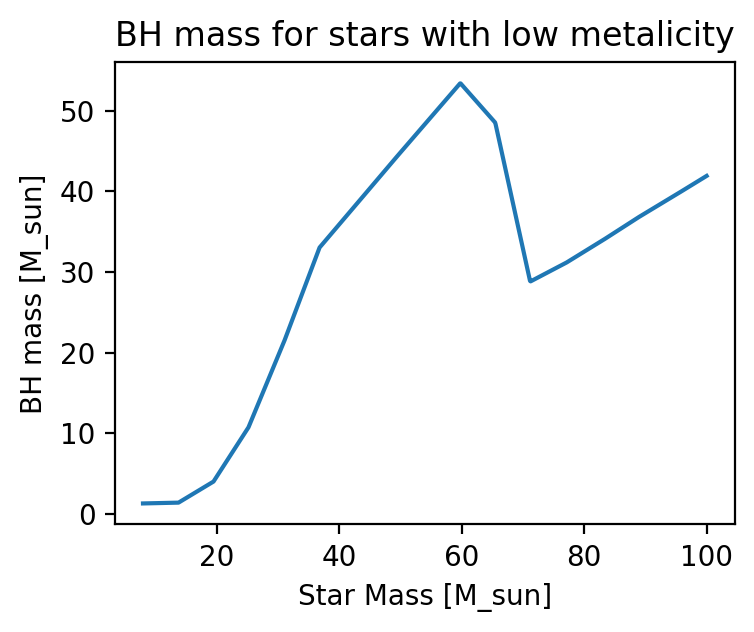

In [17]:
mspan = np.linspace(8,100,1000)
massTransform = sim._make_mass_lookup() 
bh_mass = massTransform(mspan)

plt.figure(figsize=(4,3))
plt.plot(mspan,bh_mass)
plt.title('BH mass for stars with low metalicity')
plt.xlabel('Star Mass [M_sun]')
plt.ylabel('BH mass [M_sun]')

In [25]:
randmasses1 = np.array([sim.random_mass() for i in range(100000)])
randmasses2 = np.array([sim.random_mass() for i in range(100000)])
randmasses3 = np.array([sim.random_mass() for i in range(100000)])
randmasses4 = np.array([sim.random_mass() for i in range(100000)])

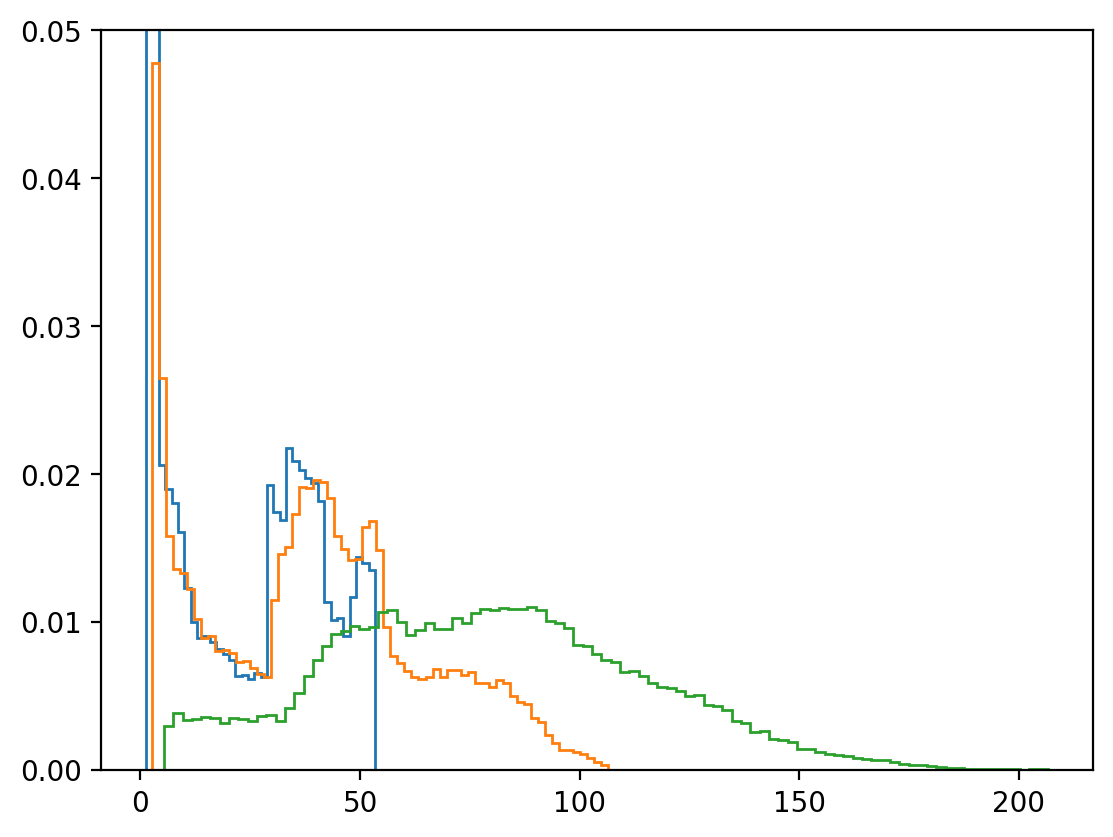

In [28]:
plt.hist(randmasses1,bins='auto',density=True,histtype='step',label='G1')
plt.hist(randmasses1+randmasses2,bins='auto',density=True,histtype='step',label='G2')
plt.hist(randmasses1+randmasses2+randmasses3+randmasses4,bins='auto',density=True,histtype='step',label='G3')
plt.ylim(0,0.05)
plt.show()